# Analyze the read mapping results to see if we can validate that a viral genome is present, and whether we would be able to get an assembly out of the viral reads

In [3]:
library(readr)
library(dplyr, warn.conflicts = F)
library(purrr)
library(ggplot2)
library(tidyr)

In [4]:
setwd("..")

## Nucleotide mapping

### Read in maps to add metadata to mapping results

In [6]:
genome_map <- read_tsv("sandbox/try_mapping/genome_map.tsv", show_col_types = F)
sample_map <- read_tsv("sandbox/try_mapping/sample_map.tsv", show_col_types = F) %>%
  rename(run_vog = vog, run_blast = blast)

### Interogate coverage profiles

In [28]:
# read in coverage profiles
coverage <- Sys.glob('sandbox/try_mapping/*coverage') %>%
  set_names() %>%
  map_dfr(read_tsv, show_col_types = F, .id = "run") %>%
  mutate(run = gsub("_nucleotides_pe.coverage", "", basename(run))) %>%
  rename(chr_accession = `#rname`) %>%
  left_join(genome_map, by = "chr_accession") %>%
  left_join(sample_map, by = "run", relationship = "many-to-many") %>%
  relocate(name, .after = chr_accession) %>%
  rename(chr_name = name, chr_vog = vog, chr_vog_name = vog_name, genome_accession = accession)

In [9]:
coverage_filt <- coverage %>%
  filter(numreads != 0) %>%
  select(-startpos, -endpos, -meanbaseq, -meanmapq)

In [10]:
coverage_filt %>%
  arrange(desc(covbases))

run,chr_accession,chr_name,numreads,covbases,coverage,meandepth,genome_accession,chr_vog,chr_vog_name,type,run_vog,run_blast
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR1778915,NC_020106.1,STL polyomavirus isolate HB201,170,4551,95.2889000,3.51528000,GCF_000904055.1,1277649.YP_007354882.1,Deltapolyomavirus undecihominis,genome,1277649.YP_007354884.1,STL polyomavirus isolate HB201
SRR1779200,NC_020106.1,STL polyomavirus isolate HB201,32,1689,35.3643000,0.52763800,GCF_000904055.1,1277649.YP_007354882.1,Deltapolyomavirus undecihominis,genome,1277649.YP_007354884.1,NA
SRR8750473,AC_000018.1,Human adenovirus type 7,4,194,0.5462630,0.01303710,GCF_000859485.1,10519.AP_000537.1,Human mastadenovirus B,genome,10617.NP_040895.1,Human papillomavirus isolate HPV-mSK_013
SRR8750456,NC_001457.1,Human papillomavirus type 4,12,189,2.5703800,0.08513530,GCF_000864845.1,10617.NP_040889.1,Gammapapillomavirus,genome,10617.NP_040895.1,Human papillomavirus type 4
SRR8750456,AC_000018.1,Human adenovirus type 7,2,130,0.3660530,0.00732106,GCF_000859485.1,10519.AP_000537.1,Human mastadenovirus B,genome,10617.NP_040895.1,Human papillomavirus type 4
SRR8750456,KT254133.1,Pbunalikevirus phiFenriz,44,53,0.0805961,0.02642940,GCA_002597305.1,NA,NA,genome,10617.NP_040895.1,Human papillomavirus type 4
SRR8750734,KT254133.1,Pbunalikevirus phiFenriz,38,53,0.0805961,0.02548660,GCA_002597305.1,NA,NA,genome,10519.AP_000545.1,Severe accute respiratory syndrome coronavirus 2
SRR14862871,NC_045512.2,Severe acute respiratory syndrome coronavirus 2,34226,52,0.1738960,37.35210000,GCF_009858895.2,NA,NA,genome,1891718.YP_007346963.1,Human parvovirus B19 isolate B19-490
SRR14862871,NC_045512.2,Severe acute respiratory syndrome coronavirus 2,34226,52,0.1738960,37.35210000,GCF_009858895.2,NA,NA,genome,10798.YP_004928146.1,Human parvovirus B19 isolate B19-490


This table shows the coverage profiles of different viruses we identified in different samples.
The columns are:
* **run**: SRA accession number for the sequencing data in which a virus was detected.
* **chr_accession**: "chr" stands for chromosome. In this case, it's the "chromosome" accession in the top of the genome's FASTA header
* **chr_name**: chromosome name
* **numreads**: the number of reads that mapped from a given sample to a given chromosome
* **covbases**: the number of bases in the chromosome that are covered by the reads. 
* **covereage**: the average coverage depth of the genome.
* **meandepth**: the mean number of reads that cover a given base pair in the genome.
* **genome_accession**: the genbank accession for the genome
* **chr_vog**: if the reference genome was included because it matched to a VOG ortholog, the name of the VOG itself
* **chr_vog_name**: the lineage assigned to the VOG *chr_vog* in the VOG database.
* **type**: the type of material that was mapped against (all are genome)
* **run_vog**: the best VOG match for the run
* **run_blast**: the best BLAST match for the run

Note the alphapolyoma viruses are `1891718.YP_007346963.1` (lineage Viruses;Shotokuvirae;Cossaviricota;Papovaviricetes;Sepolyvirales;Polyomaviridae;Alphapolyomavirus;Alphapolyomavirus cardiodermae;unclassified Alphapolyomavirus cardiodermae subspecies/strain)

From this, we can tell that the covered bases is more important than the number of reads mapped.
Greater than ~150 bases covered starts to become fairly confident that the thing observed is the thing that's actually there.
The higher the covered bases, the greater liklihood that we could recover a viral genome from the sample.
From these samples, we were able to recover one deltapolyoma capsid assembly.

### For higher coverage genomes, map depth

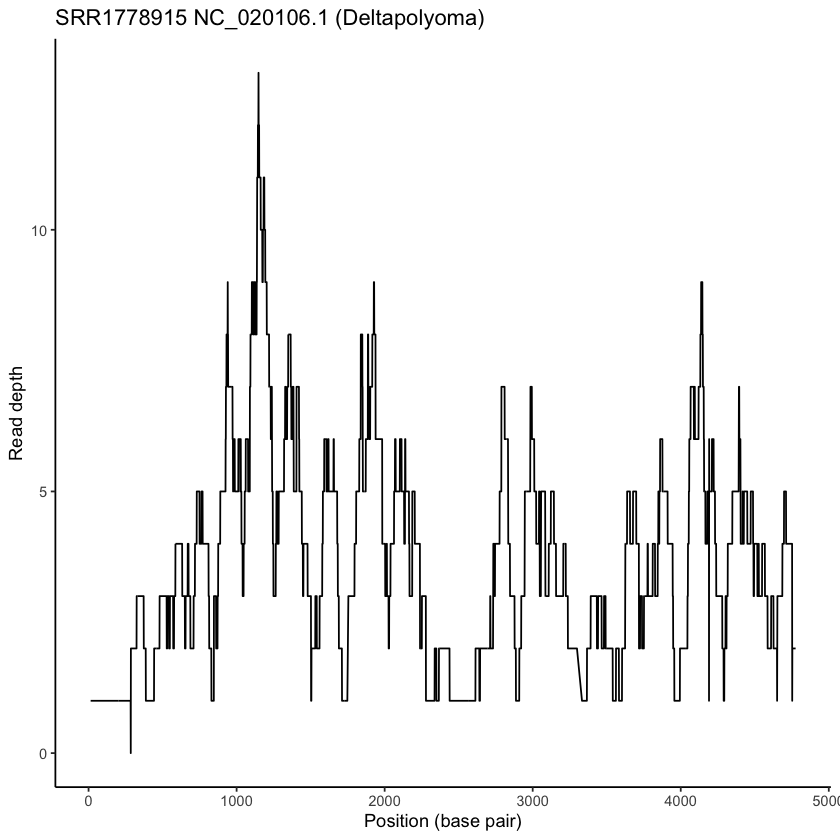

In [12]:
SRR1778915_depth <- read_tsv("sandbox/try_mapping/SRR1778915_nucleotides_pe.depth", 
                             col_names = c("chr_name", "position", "depth"),
                             show_col_types = F) %>%
  filter(chr_name %in% c("NC_020106.1"))
ggplot(SRR1778915_depth, aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SRR1778915 NC_020106.1 (Deltapolyoma)",
       x = "Position (base pair)",
       y = "Read depth") +
  theme_classic()

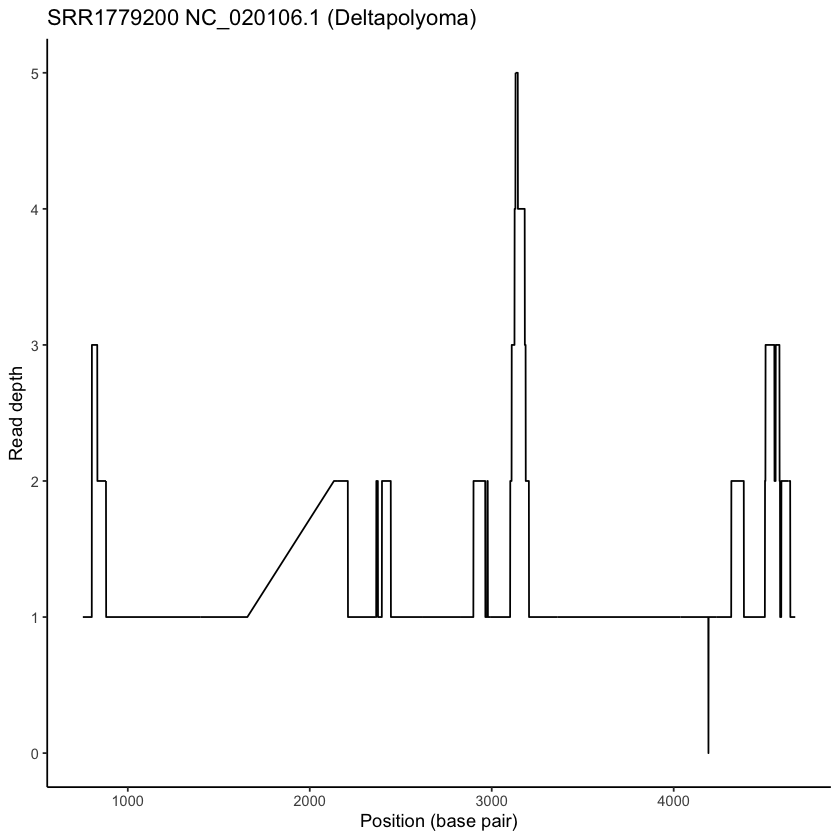

In [13]:
SRR1779200_depth <- read_tsv("sandbox/try_mapping/SRR1779200_nucleotides_pe.depth", 
                             col_names = c("chr_name", "position", "depth"),
                             show_col_types = F) %>%
  filter(chr_name %in% c("NC_020106.1"))
ggplot(SRR1779200_depth, aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SRR1779200 NC_020106.1 (Deltapolyoma)",
       x = "Position (base pair)",
       y = "Read depth") +
  theme_classic()

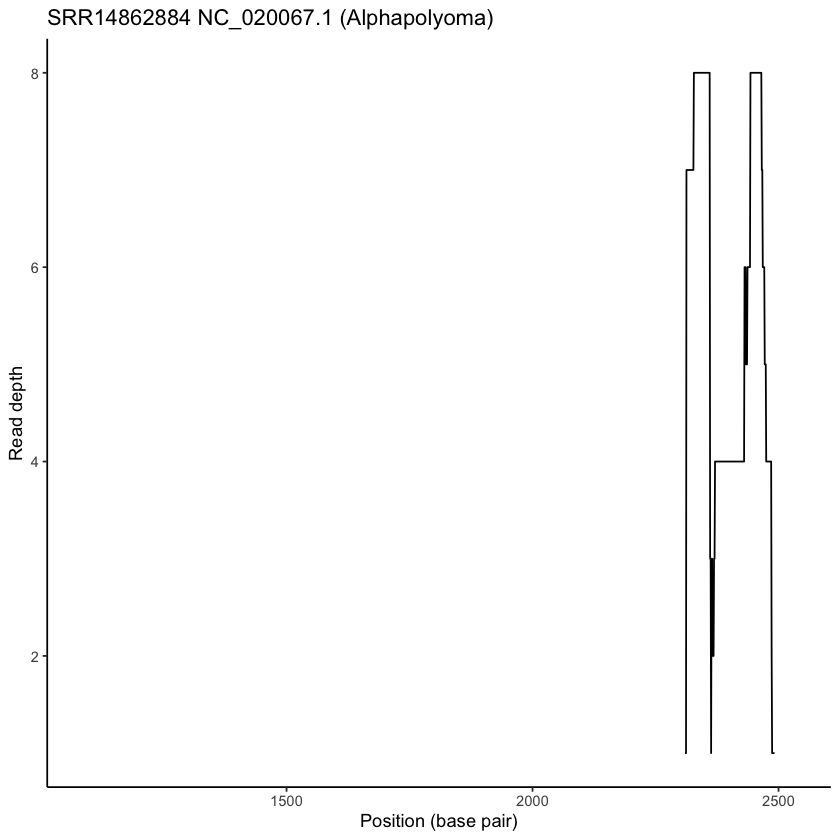

In [14]:
SRR14862884_depth <- read_tsv("sandbox/try_mapping/try_coverage_on_unfiltered_bams/SRR14862884_nucleotides.depth", 
                              col_names = c("chr_name", "position", "depth"),
                              show_col_types = F) %>%
  filter(chr_name %in% c("NC_020067.1"))
ggplot(SRR14862884_depth, aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SRR14862884 NC_020067.1 (Alphapolyoma)",
       x = "Position (base pair)",
       y = "Read depth") +
  theme_classic() +
  #xlim(1, 5372)
  xlim(1086, 2534) # limit to CDS

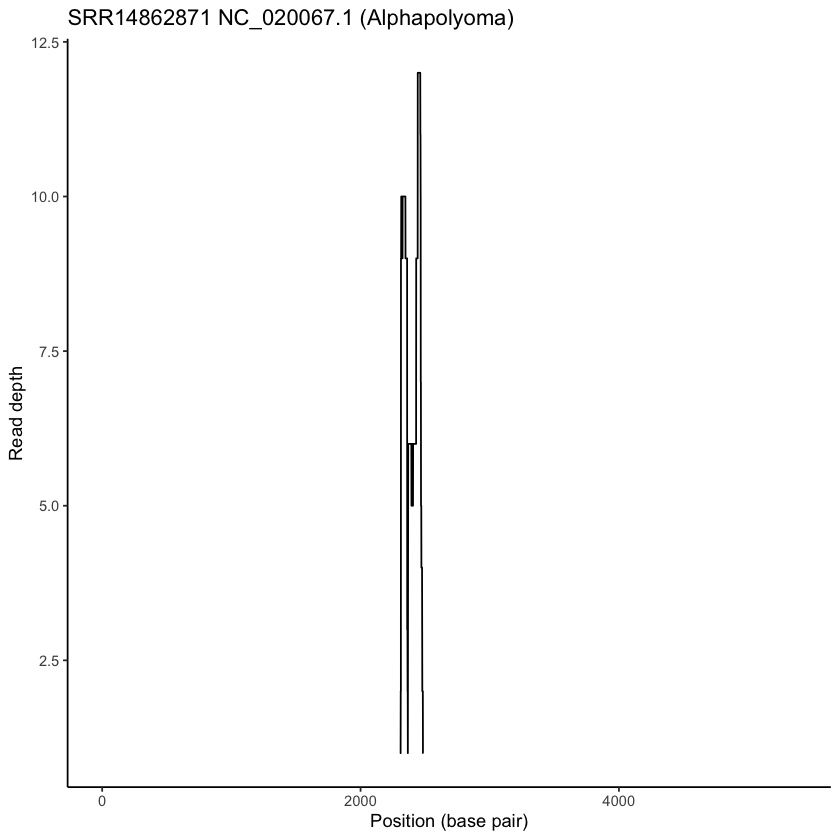

In [15]:
SRR14862871_depth <- read_tsv("sandbox/try_mapping/try_coverage_on_unfiltered_bams/SRR14862871_nucleotides.depth", 
                              col_names = c("chr_name", "position", "depth"),
                              show_col_types = F) %>%
  filter(chr_name %in% c("NC_020067.1"))
ggplot(SRR14862871_depth, aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SRR14862871 NC_020067.1 (Alphapolyoma)",
       x = "Position (base pair)",
       y = "Read depth") +
  theme_classic() +
  xlim(1, 5372)

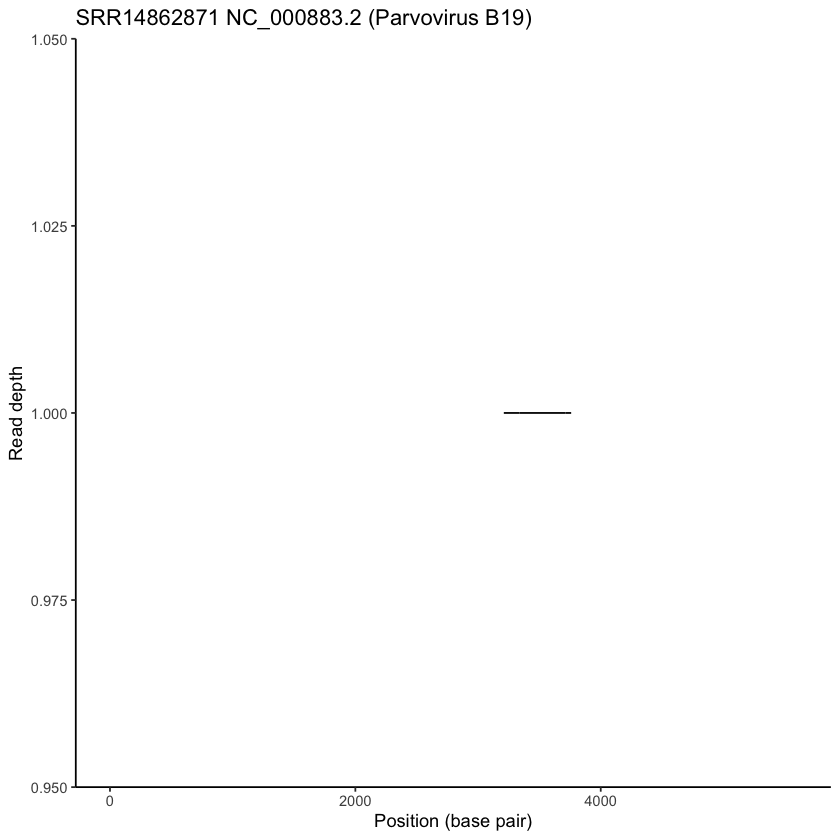

In [16]:
SRR14862871_depth <- read_tsv("sandbox/try_mapping/try_coverage_on_unfiltered_bams/SRR14862871_nucleotides.depth", 
                              col_names = c("chr_name", "position", "depth"),
                              show_col_types = F) %>%
  filter(chr_name %in% c("NC_000883.2"))
ggplot(SRR14862871_depth, aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SRR14862871 NC_000883.2 (Parvovirus B19)",
       x = "Position (base pair)",
       y = "Read depth") +
  theme_classic() +
  xlim(1, 5596)

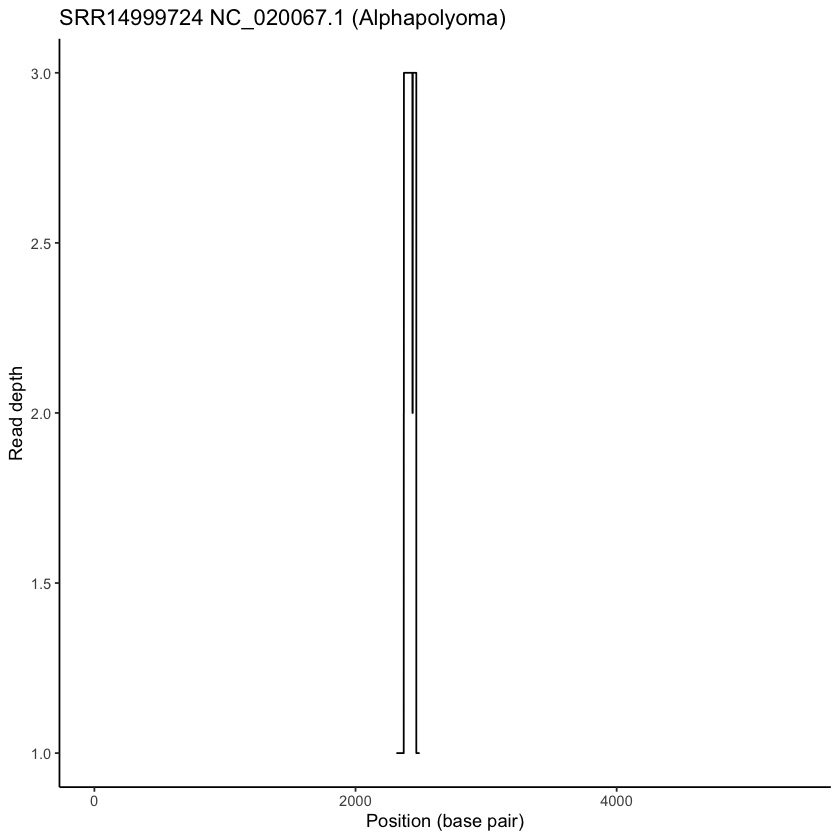

In [17]:
SRR14999724_depth <- read_tsv("sandbox/try_mapping/try_coverage_on_unfiltered_bams/SRR14999724_nucleotides.depth",
                              col_names = c("chr_name", "position", "depth"),
                              show_col_types = F) %>%
  filter(chr_name %in% c("NC_020067.1"))
ggplot(SRR14999724_depth, aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "SRR14999724 NC_020067.1 (Alphapolyoma)",
       x = "Position (base pair)",
       y = "Read depth") +
  theme_classic() +
  xlim(1, 5372)

## Protein mapping

### Play with diamond mapping results

In [18]:
# make protein map by parsing proteins.txt
# proteins.txt was produced with: `grep ">" proteins.faa > proteins.txt`
# proteins <- read_tsv("sandbox/try_mapping/proteins.txt", col_names = "name") %>%
#   mutate(name = gsub(">", "", name),
#          chr_name = gsub(" .*", "", name)) %>%
#   separate(name, into = c("protein_name", "name"), sep = "\\[") %>%
#   mutate(name = gsub("\\]", "", name)) %>%
#   select(name, chr_name, protein_name)
# write_tsv(proteins, "sandbox/try_mapping/protein_map.tsv") 

In [20]:
protein_map <- read_tsv("sandbox/try_mapping/protein_map.tsv", show_col_types = F)

In [21]:
tmp <- read_tsv("sandbox/try_mapping/SRR8750801_proteins.tsv",
                col_names = c("qseqid", "qstart", "qend", "qlen", "qstrand", 
                              "sseqid", "sstart", "send", "slen", "pident",
                              "evalue", "cigar", "qseq_translated","full_qseq",
                              "full_qseq_mate"),
                show_col_types = F) %>%
  separate(qseqid, into = c("run", "read_number", "read_pair"), sep = "\\.", remove = F)  %>%
  left_join(protein_map, by = c("sseqid" = "chr_name")) %>%
  relocate(name)

In [22]:
tmp_paired_reads_mapped <- tmp %>%
  group_by(run, read_number) %>%
  tally() %>%
  filter(n >= 2) %>%
  mutate(run_read_number = paste0(run, read_number, sep = "_"))

In [23]:
tmp_filtered <- tmp %>%
  mutate(run_read_number = paste0(run, read_number, sep = "_")) %>%
  filter(run_read_number %in% tmp_paired_reads_mapped$run_read_number)

In [24]:
table(tmp_filtered$name)


                 Alphapolyomavirus cardiodermae 
                                            112 
                             Human adenovirus 7 
                                             94 
                           Human papillomavirus 
                                             14 
                         Human papillomavirus 4 
                                             12 
                           Human parvovirus B19 
                                             28 
                       Pbunalikevirus phiFenriz 
                                             50 
Severe acute respiratory syndrome coronavirus 2 
                                             74 
                               STL polyomavirus 
                                              2 

**There's too much non-specific mapping to be confident of the amino acid mapping results.**

In [26]:
tmp_filtered %>%
  group_by(name, protein_name) %>%
  tally() %>%
  arrange(desc(n))

name,protein_name,n
<chr>,<chr>,<int>
Alphapolyomavirus cardiodermae,YP_007346963.1 major structural protein VP1,92
Severe acute respiratory syndrome coronavirus 2,YP_009724390.1 surface glycoprotein,40
Human parvovirus B19,YP_004928144.1 non-structural protein NS1,22
Human adenovirus 7,AP_000560.1 E3 RID-alpha,20
Severe acute respiratory syndrome coronavirus 2,YP_009724389.1 ORF1ab polyprotein,20
Pbunalikevirus phiFenriz,ALJ99519.1 hypothetical protein,18
Alphapolyomavirus cardiodermae,YP_007346964.1 large T antigen,16
Pbunalikevirus phiFenriz,ALJ99463.1 putative minor head protein,16
Human papillomavirus,AYA93430.1 MAG: E6 protein,14


Especially since the non-specific mapping appears to be spread across viral genomes, e.g. not just to one protein sequence, like it is in the nucleotide mapping.

Since paladin mapping had basically no reads mapped, and the diamond results are too nonspecific to make any conclusions, I conclude that amino acid mapping wasn't useful to validating the presence of viral genomes and recovering viral genomes from samples.

## sessionInfo

In [27]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/sandbox/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tidyr_1.3.0   ggplot2_3.4.2 purrr_1.0.1   dplyr_1.1.2   readr_2.1.4  

loaded via a namespace (and not attached):
 [1] pillar_1.9.0     compiler_4.2.3   base64enc_0.1-3  tools_4.2.3     
 [5] bit_4.0.5        digest_0.6.31    uuid_1.1-0       jsonlite_1.8.4  
 [9] evaluate_0.20    lifecycle_1.0.3  tibble_3.2.1     gtable_0.3.3    
[13] pkgconfig_2.0.3  rlang_1.1.0      IRdisplay_1.1    cli_3.6.1       
[17] parallel_4.2.3   IRkernel_1.3.2   fastmap_1.1.1    repr_1.1.6      
[21] withr_2.5.0      generics_0.1.3   vctrs_0.6.1      hms_1.1.3       
[25] bit64_4.0.5 